In [2]:
# Работа с данными 
import pandas as pd
import numpy as np

# Балансировка
from imblearn.over_sampling import SMOTE

# Разделение на обучающую и тестовую выборки
from sklearn.model_selection import train_test_split

# Классификаторы
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier, Pool
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import tree

# Оценка качества
from yellowbrick.classifier import ROCAUC
from catboost.utils import get_confusion_matrix
from yellowbrick.contrib.wrapper import wrap

# Визуалцияция результатов обучения
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from yellowbrick.classifier import ConfusionMatrix
import matplotlib.pyplot as plt

# Загрузка данных

In [3]:
data = pd.read_csv(r'feature_data_new_mini.csv')
goal_origin = pd.read_csv(r'goal_fail_loco_2.csv')
goal = goal_origin.copy()

C:\Users\olga.pronevich\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (113,116,119,122,125) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
goal_cipher = pd.read_csv(r'goal_cipher.csv')
goal_cipher.head()

,Unnamed: 0,ser_loc,zns_loc,prs_loc,year_month,fail_place,fail_reason,fail_type,day
0,0,134,171.0,1.0,2021-01,Дуриан,Момордика,Мармеладный плод,12
1,3,134,166.0,1.0,2021-01,Маракуйя,Либерика,Салакка,12
2,4,240,1068.0,1.0,2021-01,Земляной орех,Абрикос,Пара-гуайява,5
3,7,240,2200.0,1.0,2021-01,Маракуйя,Гранат,Мармеладный плод,17
4,9,240,2734.0,1.0,2021-01,Земляной орех,Бананы,Гнетум гнемон,4


# Чистка данных

In [5]:
print(len(data.index))
data = data.drop_duplicates()
print(len(data.index))

167254
165691


# Сравнение дата-сетов

In [200]:
data.head()

,ser_loc,zns_loc,prs_loc,year_month,count_fail,107_repair_count,307_repair_count,308_repair_count,309_repair_count,521_repair_count,...,тл-2к_y,тл-2к1,эд118а,эд118б,эдп810,эк-810ч,экг-8ж,power,last_of_p_data,last_of_in_invent
0,107,3.0,1.0,2020-01-28,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3250.0,0.0,0.0
1,107,3.0,1.0,2019-03-28,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3250.0,0.0,0.0
2,107,4.0,1.0,2020-04-28,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3080.0,0.0,0.0
3,107,4.0,1.0,2020-06-28,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3080.0,6.0,6.0
4,107,4.0,1.0,2020-07-28,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3080.0,10.0,10.0


In [201]:
goal.head()

,ser_loc,zns_loc,prs_loc,YEAR_MONTH,fail_place,fail_reason,fail_type,day
0,134,171.0,1.0,2021-01,Тормозное и пневматическое оборудование локомо...,прочая неисправность манжеты клапана песочницы,конструкционный,12
1,145,80.0,1.0,2021-01,Тормозное и пневматическое оборудование локомо...,прочая неисправность корпуса концевого крана,конструкционный,16
2,233,1716.0,1.0,2021-01,"Электрооборудование силовой цепи, вспомогатель...",низкое омическое сопротивление дугасительной к...,конструкционный,20
3,134,166.0,1.0,2021-01,"Тяговые электрические машины локомотива, МВПС","переброс, круговой огонь в коллекторе тягового...",деградационный,12
4,240,1068.0,1.0,2021-01,"Электрооборудование силовой цепи, вспомогатель...",прочая неисправность аккумуляторной батареи,производственный при ремонте,5


# Выделяем целевой массив

In [202]:
goal = goal[goal['fail_place'] == 'Тяговые электрические машины локомотива, МВПС']

# Готовим данные к объединению

In [203]:
goal = goal[['ser_loc','zns_loc','prs_loc','YEAR_MONTH', 'day']]
goal.columns = [x.lower() for x in goal.columns]
goal['day'] = [int(x) for x in goal['day']]
data.head()

data['year_month'] = pd.to_datetime(data['year_month'], format='%Y-%m')
goal['year_month'] = pd.to_datetime(goal['year_month'], format='%Y-%m')

data['year_month'] = data['year_month'].dt.to_period('M')
goal['year_month'] = goal['year_month'].dt.to_period('M')

data.head()

,ser_loc,zns_loc,prs_loc,year_month,count_fail,107_repair_count,307_repair_count,308_repair_count,309_repair_count,521_repair_count,...,тл-2к_y,тл-2к1,эд118а,эд118б,эдп810,эк-810ч,экг-8ж,power,last_of_p_data,last_of_in_invent
0,107,3.0,1.0,2020-01,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3250.0,0.0,0.0
1,107,3.0,1.0,2019-03,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3250.0,0.0,0.0
2,107,4.0,1.0,2020-04,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3080.0,0.0,0.0
3,107,4.0,1.0,2020-06,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3080.0,6.0,6.0
4,107,4.0,1.0,2020-07,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3080.0,10.0,10.0


# Объединяем массивы

In [263]:
data_new = data.merge(goal, on = ['ser_loc','zns_loc','prs_loc','year_month'], how = 'outer')
data_new.head()

,ser_loc,zns_loc,prs_loc,year_month,count_fail,107_repair_count,307_repair_count,308_repair_count,309_repair_count,521_repair_count,...,тл-2к1,эд118а,эд118б,эдп810,эк-810ч,экг-8ж,power,last_of_p_data,last_of_in_invent,day
0,107,3.0,1.0,2020-01,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3250.0,0.0,0.0,NaN
1,107,3.0,1.0,2019-03,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3250.0,0.0,0.0,NaN
2,107,4.0,1.0,2020-04,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3080.0,0.0,0.0,NaN
3,107,4.0,1.0,2020-06,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3080.0,6.0,6.0,NaN
4,107,4.0,1.0,2020-07,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3080.0,10.0,10.0,NaN


# Ищем и чисти плохие столбцы

In [264]:
data_new = data_new.dropna(subset = ['count_fail'])

In [289]:
i = 0
for col_name in data.columns:
    if col_name.find('_x_') == True:
        print(i)
    i += 1    

In [278]:
# data_new = data_new.drop(columns=['date_repair_finish_y_1',
#        '307_was_last', 'last_of_307repair', 'date_repair_finish_x_2',
#        '309_was_last', 'last_of_309repair', 'date_repair_finish_y_2', 'date_repair_finish', 
#        'date_repair_finish_x_1'])
data_new = data_new.drop(columns=['date_repair_finish_y_1',
       'date_repair_finish_x_2',
       'date_repair_finish_y_2', 'date_repair_finish', 
       'date_repair_finish_x_1'])

# Подготовка данных к классификации 

In [279]:
data_new['day'] = [1 if x > 0 else 0 for x in data_new['day']]
data_new = data_new.set_index(['ser_loc','zns_loc','prs_loc','year_month'])

In [280]:
data_new['day'].value_counts()

0    164888
1      2238
Name: day, dtype: int64

In [209]:
y = data_new[['day']]
X = data_new.drop(columns=['day'])

In [282]:
# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(\
   X, y, test_size=0.33, random_state=42)

# CatBoostClassifier

In [283]:
clf = CatBoostClassifier(
    iterations=5, 
    learning_rate=0.1, 
    loss_function='CrossEntropy'
)

In [284]:
clf.fit(X_train, y_train,         
        eval_set=(X_test, y_test), 
        verbose=False
)

# Точность на обучающей и тестовой выборке (средняя)

In [285]:
train_score = clf.score(X_train, y_train) # train (learn) score
train_score

0.9867112008144748

In [286]:
val_score = clf.score(X_test, y_test) # val (test) score
val_score

0.9864012184508268

In [287]:
clf.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

# Детальное рассмотрение точности

In [217]:
print('Количество верно спрогнозированных событий')
len(Predict_test[(Predict_test['predict'] == 1)&(Predict_test['day'] == 1)])

0

In [218]:
len(Predict_test[(Predict_test['predict'] == 0)&(Predict_test['day'] == 0)])

54402

In [219]:
len(Predict_test[(Predict_test['predict'] == 1)&(Predict_test['day'] != 1)])

0

In [220]:
len(Predict_test[(Predict_test['predict'] == 0)&(Predict_test['day'] != 0)])

750

# Визуализация точности

In [222]:
cm = get_confusion_matrix(clf, Pool(np.array(X_train), np.array(y_train)))
cm

array([[110486.,      0.],
       [  1488.,      0.]])

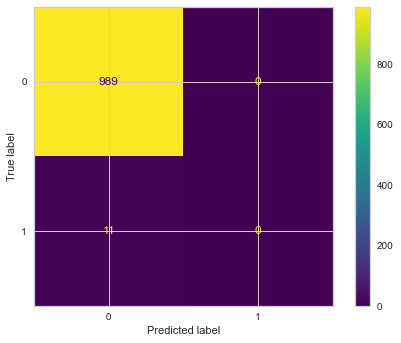

In [223]:
сmm = confusion_matrix(y_test[:1000], clf.predict(X_test[:1000]), labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=сmm,
                              display_labels=clf.classes_)
disp.plot()
plt.show()

# Дерево решений

In [305]:
tree_model = DecisionTreeClassifier(max_depth = 10,
    criterion='gini',
    splitter='best',
    class_weight = 'balanced')
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=10)

In [306]:
train_score = tree_model.score(X_train, y_train) # train (learn) score
val_score = tree_model.score(X_test, y_test) # val (test) score
print('Точность на тренировочной выборке', train_score)
print('Точность на тестовой выборке', val_score)

Точность на тренировочной выборке 0.9390483505099398
Точность на тестовой выборке 0.9369923121554975


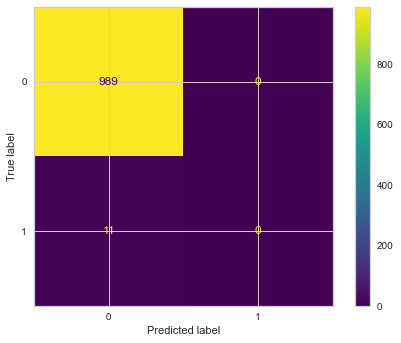

In [308]:
сmm_tree_1 = confusion_matrix(y_test, tree_model.predict(X_test), labels=tree_model.classes_)
disp_tree = ConfusionMatrixDisplay(confusion_matrix=сmm_tree,
                              display_labels=tree_model.classes_)
disp_tree.plot()
# plt.show()

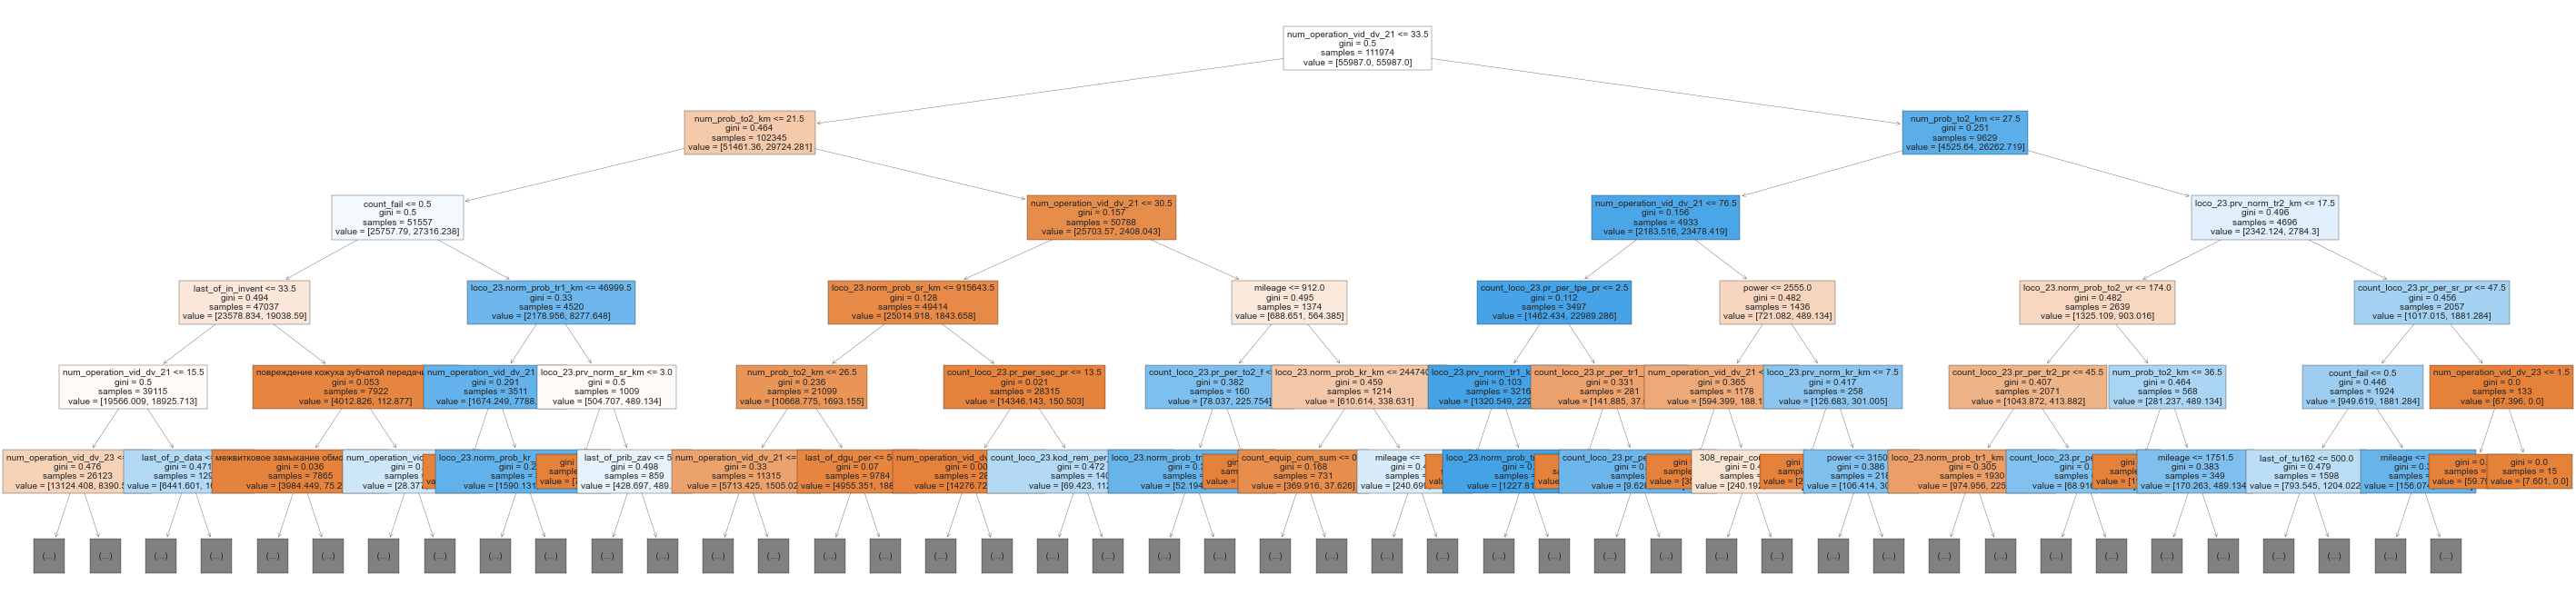

In [309]:
plt.figure(figsize=(50,12)) #figsize=(x,y) х - ширина картинки, y - высотак
tree.plot_tree(tree_model, fontsize=10, feature_names = X_train.columns, max_depth = 5,filled = True)
plt.show()

# Балансировка данных

In [310]:
sm = SMOTE(random_state=42, k_neighbors=5)
X_res, y_res = sm.fit_resample(X_train, y_train)

In [311]:
tree_model = DecisionTreeClassifier(max_depth = 10,
    criterion='gini',
    splitter='best'
    )
tree_model.fit(X_res, y_res)

train_score = tree_model.score(X_res, y_res) # train (learn) score
val_score = tree_model.score(X_test, y_test) # val (test) score
print('Точность на тренировочной выборке', train_score)
print('Точность на тестовой выборке', val_score)

Точность на тренировочной выборке 0.9354986152091668
Точность на тестовой выборке 0.9445351029881056


In [312]:
Predict_test = y_test.copy()
Predict_test['predict'] = tree_model.predict(X_test)
print('Вероно спрогнозированное событие, %: ', len(Predict_test[(Predict_test['predict'] == 1)&(Predict_test['day'] == 1)].index)/len(Predict_test[Predict_test['day'] == 1].index))
print('Вероно спрогнозированное отсуствие события, %: ', len(Predict_test[(Predict_test['predict'] == 0)&(Predict_test['day'] == 0)].index)/len(Predict_test[Predict_test['day'] == 0].index))

# len(Predict_test[(Predict_test['predict'] == 1)&(Predict_test['day'] == 1)].index)/len(Predict_test.index)

Вероно спрогнозированное событие, %:  0.7173333333333334
Вероно спрогнозированное отсуствие события, %:  0.9476673651703982


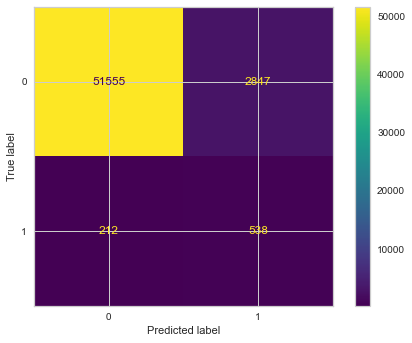

In [316]:
сmm_tree_1 = confusion_matrix(y_test, tree_model.predict(X_test), labels=tree_model.classes_)
disp_tree = ConfusionMatrixDisplay(confusion_matrix=сmm_tree_1,
                              display_labels=tree_model.classes_)
disp_tree.plot()